In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from math import log
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
from graphviz import Source
from pydotplus import graph_from_dot_data
from IPython.display import Image

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv("path_to_file\\train.csv")
data.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3640,2011-09-02 14:00:00,3,0,1,2,28.70,32.575,61,7.0015,75,208,283
6799,2012-04-01 14:00:00,2,0,0,2,19.68,23.485,55,15.0013,283,278,561


In [3]:
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
data['hour'] = pd.DatetimeIndex(data['datetime']).hour
data = data.drop(columns=['datetime'])
data.sample(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
4701,4,0,1,1,14.76,18.940,81,0.0000,3,45,48,2011,11,8,23
1576,2,0,1,2,29.52,33.335,54,23.9994,60,85,145,2011,4,11,14


In [4]:
data["season"] = data["season"].astype('category')
data["holiday"] = data["holiday"].astype('category')
data["workingday"] = data["workingday"].astype('category')
data["weather"] = data["weather"].astype('category')
data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
year             int64
month            int64
day              int64
hour             int64
dtype: object

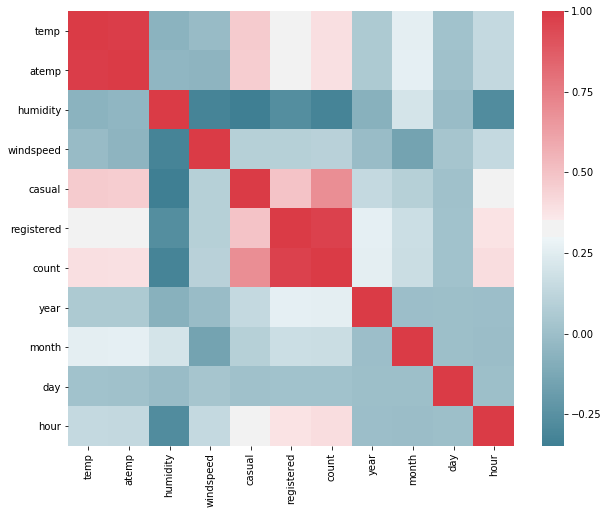

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sea.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sea.diverging_palette(220, 10, as_cmap=True))

temp и atemp сильно коррелируют - удаляем temp

In [6]:
data = data.drop(columns=['temp', 'registered', 'casual'])
data.dtypes

season        category
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count            int64
year             int64
month            int64
day              int64
hour             int64
dtype: object

D:\anaconda_python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


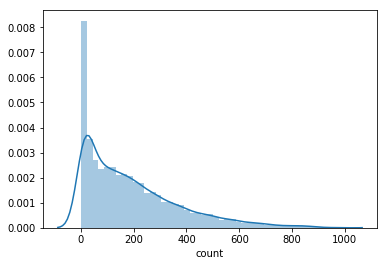

In [7]:
sea.distplot(data["count"])

не нра мне это распределение, ну да ладно

In [8]:
data_features = data.drop(columns=["count"])
data_result = data["count"]
ft_train, ft_test, res_train, res_test = train_test_split(data_features, data_result)

In [9]:
tree = DecisionTreeRegressor()
tree.fit(ft_train.values, res_train.values)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
res_pred = tree.predict(ft_test)
metrics.mean_squared_error(res_pred, res_test), metrics.mean_squared_error(tree.predict(ft_train), res_train)

(3904.527185892726, 0.0)

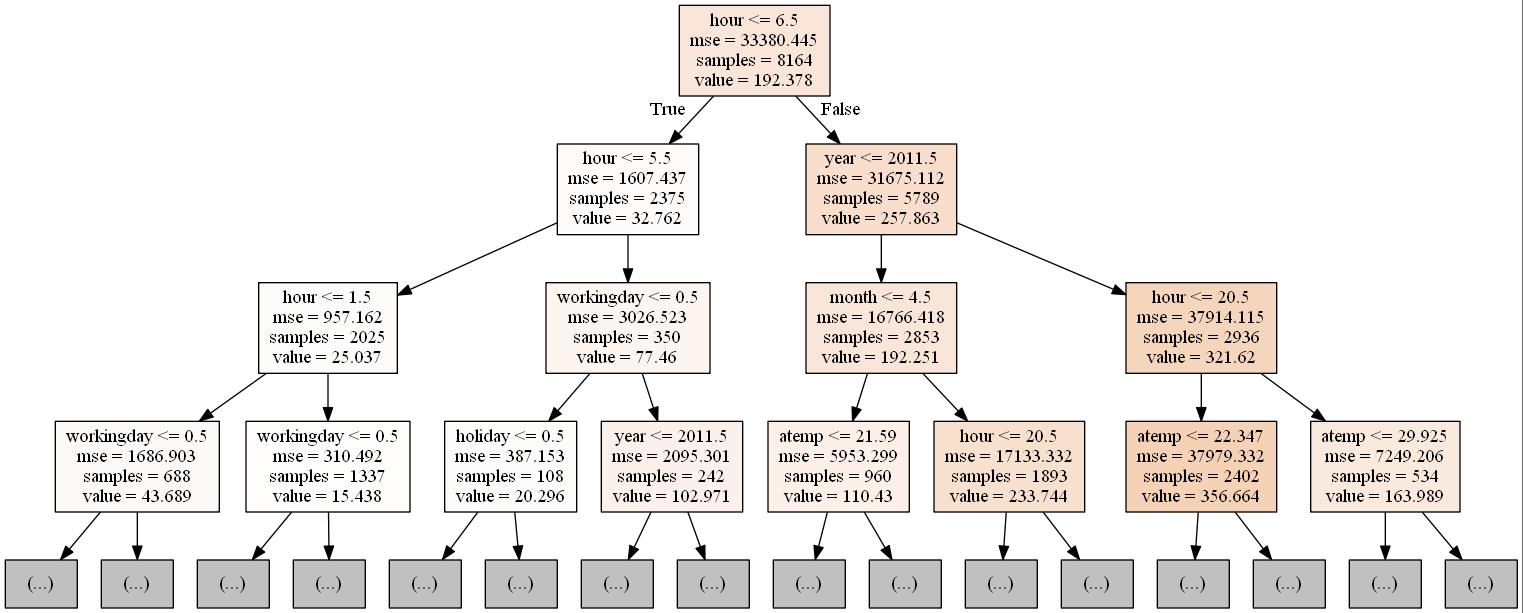

In [11]:
dot_data = export_graphviz(tree, max_depth=3, feature_names=data_features.columns, out_file=None, filled=True)
graph = graph_from_dot_data(dot_data)  
Image(Source(dot_data).pipe(format='jpg'))

In [12]:
params = {
    "criterion" : ["mse", "mae"],
    "min_samples_split" : [0.001, 0.005, 0.01, 0.05]
}

tree_cv = GridSearchCV(tree, params, scoring='neg_mean_squared_error')
tree_cv.fit(ft_train.values, res_train.values)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [13]:
tree_cv.best_params_

{'criterion': 'mse', 'min_samples_split': 0.005}

In [14]:
params = {
    "min_samples_split" : [0.003, 0.004, 0.005, 0.006, 0.007]
}

tree_cv = GridSearchCV(tree, params, scoring='neg_mean_squared_error')
tree_cv.fit(ft_train.values, res_train.values)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [0.003, 0.004, 0.005, 0.006, 0.007]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [15]:
tree_cv.best_params_

{'min_samples_split': 0.003}

In [16]:
best_pred = tree_cv.best_estimator_.predict(ft_test)
metrics.mean_squared_error(best_pred, res_test), metrics.mean_squared_error(tree_cv.best_estimator_.predict(ft_train), res_train)

(3087.7974095364216, 1610.2356204281436)